### Abrir archivo features


In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.5 MB/s eta 0:00:00


In [48]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.4 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')
path = '/content/drive/MyDrive/Machine Learning/Proyecto 3/ML_proyecto_3-main'
path = '.'

Mounted at /content/drive


In [3]:
df = pd.read_csv(path + '/datasets/training_r21d_all_10_mean.csv')       # data training con el target
X_train = df.iloc[:,1:-2]
Y_train = df.iloc[:, -2]
# print(X_train)
# print(Y_train)

In [4]:
df = pd.read_csv(path + '/datasets/val_r21d_complete_10.csv')       # data training con el target
X_val = df.iloc[:,1:-3]
Y_val = df.iloc[:, -3]
# print(X_val)
# print(Y_val)

In [5]:
df = pd.read_csv(path + '/datasets/test_r21d_complete_10.csv')       # data training con el target
X_test = df.iloc[:,1:-1]
# print(X_test)

### Reducción de dimensionalidad


In [7]:
def graph_components(num_components, method, varianza_explicada):
    plt.figure(figsize=(10, 6))
    plt.bar(num_components, varianza_explicada, alpha=0.5, align='center', label='Varianza individual explicada')
    plt.step(num_components, np.cumsum(varianza_explicada), where='mid', label='Varianza acumulada')
    plt.ylabel('Porcentaje de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.title('Scree Plot de ' + method)
    plt.legend(loc='best')
    plt.axhline(y=95, color='r', linestyle='--')  # Línea opcional para el umbral de varianza deseado, ej. 95%
    plt.show()

In [107]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_train)

print("data scaled")
print(data_scaled)
print("max", np.max(data_scaled))
print("min", np.min(data_scaled))

X_train_scaled = data_scaled

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)

data scaled
[[ 1.83620439 -0.91279091 -0.1195221  ... -0.66089667 -0.72470607
   0.90035303]
 [-0.30091796 -0.76995632  0.64169529 ... -0.3880678  -0.41626473
   0.26794282]
 [-0.46746561  1.81652137  0.0668968  ... -0.75397902 -0.26417388
  -0.57057412]
 ...
 [-1.31747121 -0.66253198 -0.56619558 ... -0.79620616  0.55276125
   0.58199193]
 [-0.12969289 -0.00435783 -0.64283866 ... -0.61261338 -0.5825971
   1.01780216]
 [ 0.27850179  0.04875291 -0.71099374 ...  0.03093929 -0.53175494
  -0.06855909]]
max 11.948867782324974
min -2.0542499510158576


#### LDA

(5424, 9)


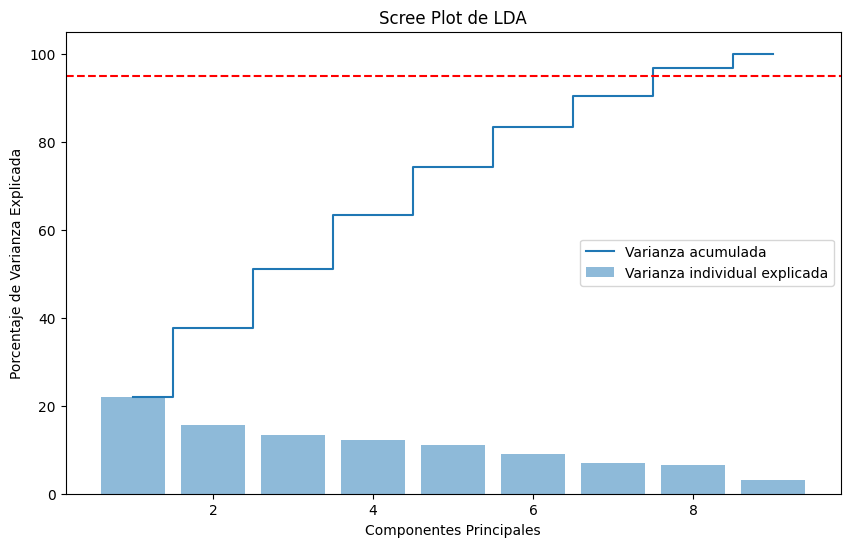

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, Y_train)
print(X_lda.shape)
varianza_explicada = lda.explained_variance_ratio_ * 100
num_componentes = np.arange(len(varianza_explicada)) + 1

graph_components(num_componentes, "LDA", varianza_explicada)

In [12]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, Y_train.to_numpy())

# Transformar los datos al nuevo espacio
X_train_lda = lda.transform(X_train_scaled)      # features_transformed es un numpy array

# Test
X_test_lda = lda.transform(X_test_scaled)      # features_transformed es un numpy array

# Validation
X_val_lda = lda.transform(X_val_scaled)      # features_transformed es un numpy array

#### UMAP

In [108]:
import umap

reducer = umap.UMAP()
X_train_umap = reducer.fit_transform(X_train_scaled)

reducer = umap.UMAP()
X_test_umap = reducer.fit_transform(X_test_scaled)

reducer = umap.UMAP()
X_val_umap = reducer.fit_transform(X_val_scaled)

### Accuracy testing

#### Kmeans

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

#### Algorithm

In [110]:
rand_state_umap = (3, (2098827528, 1977305324, 1830452798, 2615692405, 3354621329, 1919062020, 1738357305, 3482095509, 2822624777, 3325251282, 1023262928, 435710089, 1399084594, 3428156091, 1428699080, 3047862099, 758192293, 3637349126, 2470814628, 885406571, 1532284476, 238676046, 2021725335, 1227492861, 794933428, 299861635, 3688958156, 3948349470, 304141949, 2480833102, 681932323, 3559576951, 3286839169, 2166509372, 3946335881, 4048971262, 257626542, 1607776523, 844114137, 4087640407, 2108024853, 3279793114, 279117891, 700504709, 742360478, 2631903663, 1956151616, 2385476039, 2206767168, 53586034, 1478224362, 3765782637, 3354607359, 954924302, 2201540420, 1651536896, 823525748, 1577288607, 722056587, 3787038984, 904068558, 2217171694, 921730090, 1500193818, 3441753610, 2401131002, 910905900, 4081776848, 1340114027, 2197471052, 1751517156, 2154083789, 1719950363, 574229938, 3526881129, 301349084, 3381238482, 832454828, 3958392083, 3465133463, 3983826718, 362545826, 1423651494, 2223884845, 2527275395, 2478667706, 1469427359, 3126862297, 2752124178, 639962753, 792498896, 1757551457, 3317323758, 4238650789, 587927864, 1249097109, 1853350838, 3483660399, 3009252262, 746608775, 1784472866, 542441400, 4226887334, 921919264, 1728075245, 1884471441, 1321803569, 875135379, 192791656, 1103407037, 2242010306, 402724981, 1574455372, 3069665102, 2837038650, 1704659547, 1027954345, 4193318911, 1066667006, 1166913088, 3648530088, 2533759996, 23581696, 674026175, 3262447859, 950440217, 1914343429, 1375227336, 1830129907, 222247828, 85856941, 1260010660, 3257746282, 1361547342, 3980350666, 3547723821, 1140272078, 1695136838, 1575542868, 489852696, 3971342229, 1100295413, 1272400437, 3502529768, 907905084, 1607212841, 2612890888, 2475437651, 3825928938, 1595065542, 3305605975, 1433612871, 601927400, 2002890285, 2354222520, 3464479897, 4004308379, 1730443047, 2272281266, 2237749966, 1648050811, 4249730724, 2157653089, 1065328026, 1707153031, 3607923672, 844859975, 1697198296, 429461342, 3641182357, 2917888745, 4031491943, 356142500, 3732376070, 2442362541, 3366075547, 3296090801, 3476030810, 309389371, 2329220837, 1697844110, 3454162925, 1724539065, 4213960607, 3921101299, 2827866070, 788775500, 1914390721, 265429883, 434165077, 1827383189, 3592896065, 1490986694, 3744520951, 935512690, 2350007446, 3554520614, 4073144809, 1280154823, 2419071502, 2676651589, 2941361961, 2860617268, 3448088953, 1092114459, 3841645436, 4105236138, 34784675, 1571844746, 1678098376, 2161389330, 185573327, 3416982701, 3878759752, 3795923639, 4155631220, 3149555095, 3918521226, 2079755370, 2383571568, 3745605589, 1333450897, 1178194380, 2590472916, 350123878, 3228893861, 596672767, 3537346015, 3888578836, 2035673830, 2966128572, 1663655462, 70536038, 1107737404, 129806620, 3724977518, 75468377, 4280232510, 2205723615, 2701388223, 3517902448, 1348290610, 1783757866, 3984878962, 3408801641, 1678465368, 4232134500, 3708350281, 1131664713, 3612059752, 3404937942, 3105108721, 3887420780, 3827029965, 3607542554, 1472496209, 3758758480, 3041990582, 546591798, 237066033, 3600497304, 187616935, 3949938299, 366948933, 3057965493, 2970420003, 2147639008, 695559873, 3665824326, 3164196867, 3732397585, 3324589459, 2607264644, 3748453636, 3690079419, 2492896415, 2507444973, 1572894873, 3315069774, 3370868634, 159517893, 4016190697, 618248018, 4170581971, 2239179686, 201849288, 443684724, 2014312297, 1223073190, 2972404604, 2499474875, 253863155, 2552747034, 3232185236, 1827514438, 2599337925, 399498498, 1168673745, 1551523539, 1537705660, 3318708313, 2286908108, 1667341675, 316661108, 2915499660, 3417231915, 3237695807, 3999600776, 2220209724, 949127398, 2717591564, 2670251945, 883907828, 3256628099, 920269669, 1680377408, 906979410, 2923402967, 3374318521, 2987162448, 2612801529, 1218471255, 996337739, 215843986, 2008284886, 622944363, 2308648173, 350842323, 801646418, 3105084953, 2892049738, 1216853536, 1842372946, 2193470139, 2570122530, 711637756, 2371925163, 1147212362, 2941662643, 831618459, 3625636280, 3803041821, 1087231142, 4071572592, 4036599615, 1165112244, 1736728056, 691563799, 2451874394, 3910952049, 2741851269, 70001667, 300305157, 3403467318, 1846851132, 3194033603, 1994004376, 3578455531, 4150286894, 1098699126, 594978779, 3682094324, 513914806, 165734311, 2795070564, 805215592, 1079002638, 2508694336, 3280038582, 808347690, 1343109512, 1005294145, 994265488, 1212254599, 51928346, 3264211477, 804524604, 471228662, 2750598480, 3095237522, 2416804944, 530070337, 3529162453, 3294574135, 551471975, 382266684, 1378099879, 3585380331, 3208526957, 937262302, 2238520902, 2826513525, 2747139654, 3478552116, 1490179342, 2048398231, 3756723907, 3870153617, 3754543680, 1064442349, 2550092920, 1965038952, 684528362, 3457031254, 2791243139, 3730141603, 2659386667, 3305925683, 2118785598, 1425750206, 3671329498, 855880650, 742889850, 1830869577, 928195737, 4096301584, 990574085, 3961717659, 980206095, 1300933135, 3623413245, 2304894588, 3124072118, 3088379977, 2494503236, 2500045019, 2545155260, 1645076581, 4226045772, 207863563, 2045573389, 2964199557, 1985201753, 3342127290, 238246530, 3513339769, 2555547520, 3915733890, 1740425658, 1428046076, 286409383, 843494199, 2997625996, 95263743, 174151678, 2393448611, 916251361, 4047422009, 1147135052, 2836026708, 1874947263, 1354508866, 1784609426, 869354204, 2664559004, 1765832899, 2520696886, 3024166906, 1164300146, 502610484, 894067324, 861702297, 4103994410, 2874276083, 4134994954, 218971906, 3430935927, 104861330, 1270959840, 4080147586, 3166865610, 2281877290, 3110921746, 2999070672, 4098377634, 1097841959, 1074790948, 4222461224, 3437566896, 1201659269, 3221103136, 668814916, 2404748761, 1702606460, 2498143285, 2261556021, 2097951914, 327335447, 4022548456, 3667685916, 1409515774, 1908211193, 149222548, 603394794, 1073471825, 3592374017, 1855374336, 1216193901, 3889342434, 3941162783, 3268885150, 36050316, 333318254, 2985462730, 603098399, 3251125964, 166670933, 1350280580, 1701305982, 651272089, 3248088390, 3199846431, 876117908, 856561433, 1699409725, 427935531, 2647540241, 2269013282, 789669047, 855725357, 2846224811, 3517915109, 3111246257, 2393506964, 3919871073, 1411039409, 1006272929, 116146863, 3776573863, 1503016606, 800513140, 1504521453, 2059264410, 3396348504, 1185815540, 1981538388, 1728865721, 3450602503, 3519848020, 719731630, 260805680, 818520969, 1409577331, 3776756358, 2742759830, 535396862, 454244124, 4015240796, 3605910429, 1444443103, 2897253148, 4069851936, 3410573771, 2258775856, 3071806973, 3476613462, 1855422358, 3078833333, 864516483, 2039698813, 642711768, 2659217840, 152296293, 1587259308, 1604995306, 1795246609, 1871919226, 3610730321, 4139021032, 3945129919, 1634495815, 576691015, 1296381650, 766859922, 3157649591, 3401552234, 2537230074, 1379783478, 101266174, 3295084271, 742325543, 2914982424, 205311797, 3303362673, 2332077548, 3524973382, 3699131975, 2727584799, 1929203801, 3231049022, 336118393, 4032923573, 3240899557, 282196730, 784427125, 4091020388, 2156267923, 605819516, 2268827120, 801633164, 3815490000, 3247520385, 3828606056, 2196880047, 2742472733, 398414118, 4269238152, 584271515, 967290250, 1191708750, 1484092293, 4269795076, 796979076, 1561474, 2652595750, 2276478610, 785793977, 4028166123, 1469357352, 2560584045, 960331269, 1806341250, 1899848238, 3781674567, 163), None)
rand_state_lda = (3, (2098827528, 1977305324, 1830452798, 2615692405, 3354621329, 1919062020, 1738357305, 3482095509, 2822624777, 3325251282, 1023262928, 435710089, 1399084594, 3428156091, 1428699080, 3047862099, 758192293, 3637349126, 2470814628, 885406571, 1532284476, 238676046, 2021725335, 1227492861, 794933428, 299861635, 3688958156, 3948349470, 304141949, 2480833102, 681932323, 3559576951, 3286839169, 2166509372, 3946335881, 4048971262, 257626542, 1607776523, 844114137, 4087640407, 2108024853, 3279793114, 279117891, 700504709, 742360478, 2631903663, 1956151616, 2385476039, 2206767168, 53586034, 1478224362, 3765782637, 3354607359, 954924302, 2201540420, 1651536896, 823525748, 1577288607, 722056587, 3787038984, 904068558, 2217171694, 921730090, 1500193818, 3441753610, 2401131002, 910905900, 4081776848, 1340114027, 2197471052, 1751517156, 2154083789, 1719950363, 574229938, 3526881129, 301349084, 3381238482, 832454828, 3958392083, 3465133463, 3983826718, 362545826, 1423651494, 2223884845, 2527275395, 2478667706, 1469427359, 3126862297, 2752124178, 639962753, 792498896, 1757551457, 3317323758, 4238650789, 587927864, 1249097109, 1853350838, 3483660399, 3009252262, 746608775, 1784472866, 542441400, 4226887334, 921919264, 1728075245, 1884471441, 1321803569, 875135379, 192791656, 1103407037, 2242010306, 402724981, 1574455372, 3069665102, 2837038650, 1704659547, 1027954345, 4193318911, 1066667006, 1166913088, 3648530088, 2533759996, 23581696, 674026175, 3262447859, 950440217, 1914343429, 1375227336, 1830129907, 222247828, 85856941, 1260010660, 3257746282, 1361547342, 3980350666, 3547723821, 1140272078, 1695136838, 1575542868, 489852696, 3971342229, 1100295413, 1272400437, 3502529768, 907905084, 1607212841, 2612890888, 2475437651, 3825928938, 1595065542, 3305605975, 1433612871, 601927400, 2002890285, 2354222520, 3464479897, 4004308379, 1730443047, 2272281266, 2237749966, 1648050811, 4249730724, 2157653089, 1065328026, 1707153031, 3607923672, 844859975, 1697198296, 429461342, 3641182357, 2917888745, 4031491943, 356142500, 3732376070, 2442362541, 3366075547, 3296090801, 3476030810, 309389371, 2329220837, 1697844110, 3454162925, 1724539065, 4213960607, 3921101299, 2827866070, 788775500, 1914390721, 265429883, 434165077, 1827383189, 3592896065, 1490986694, 3744520951, 935512690, 2350007446, 3554520614, 4073144809, 1280154823, 2419071502, 2676651589, 2941361961, 2860617268, 3448088953, 1092114459, 3841645436, 4105236138, 34784675, 1571844746, 1678098376, 2161389330, 185573327, 3416982701, 3878759752, 3795923639, 4155631220, 3149555095, 3918521226, 2079755370, 2383571568, 3745605589, 1333450897, 1178194380, 2590472916, 350123878, 3228893861, 596672767, 3537346015, 3888578836, 2035673830, 2966128572, 1663655462, 70536038, 1107737404, 129806620, 3724977518, 75468377, 4280232510, 2205723615, 2701388223, 3517902448, 1348290610, 1783757866, 3984878962, 3408801641, 1678465368, 4232134500, 3708350281, 1131664713, 3612059752, 3404937942, 3105108721, 3887420780, 3827029965, 3607542554, 1472496209, 3758758480, 3041990582, 546591798, 237066033, 3600497304, 187616935, 3949938299, 366948933, 3057965493, 2970420003, 2147639008, 695559873, 3665824326, 3164196867, 3732397585, 3324589459, 2607264644, 3748453636, 3690079419, 2492896415, 2507444973, 1572894873, 3315069774, 3370868634, 159517893, 4016190697, 618248018, 4170581971, 2239179686, 201849288, 443684724, 2014312297, 1223073190, 2972404604, 2499474875, 253863155, 2552747034, 3232185236, 1827514438, 2599337925, 399498498, 1168673745, 1551523539, 1537705660, 3318708313, 2286908108, 1667341675, 316661108, 2915499660, 3417231915, 3237695807, 3999600776, 2220209724, 949127398, 2717591564, 2670251945, 883907828, 3256628099, 920269669, 1680377408, 906979410, 2923402967, 3374318521, 2987162448, 2612801529, 1218471255, 996337739, 215843986, 2008284886, 622944363, 2308648173, 350842323, 801646418, 3105084953, 2892049738, 1216853536, 1842372946, 2193470139, 2570122530, 711637756, 2371925163, 1147212362, 2941662643, 831618459, 3625636280, 3803041821, 1087231142, 4071572592, 4036599615, 1165112244, 1736728056, 691563799, 2451874394, 3910952049, 2741851269, 70001667, 300305157, 3403467318, 1846851132, 3194033603, 1994004376, 3578455531, 4150286894, 1098699126, 594978779, 3682094324, 513914806, 165734311, 2795070564, 805215592, 1079002638, 2508694336, 3280038582, 808347690, 1343109512, 1005294145, 994265488, 1212254599, 51928346, 3264211477, 804524604, 471228662, 2750598480, 3095237522, 2416804944, 530070337, 3529162453, 3294574135, 551471975, 382266684, 1378099879, 3585380331, 3208526957, 937262302, 2238520902, 2826513525, 2747139654, 3478552116, 1490179342, 2048398231, 3756723907, 3870153617, 3754543680, 1064442349, 2550092920, 1965038952, 684528362, 3457031254, 2791243139, 3730141603, 2659386667, 3305925683, 2118785598, 1425750206, 3671329498, 855880650, 742889850, 1830869577, 928195737, 4096301584, 990574085, 3961717659, 980206095, 1300933135, 3623413245, 2304894588, 3124072118, 3088379977, 2494503236, 2500045019, 2545155260, 1645076581, 4226045772, 207863563, 2045573389, 2964199557, 1985201753, 3342127290, 238246530, 3513339769, 2555547520, 3915733890, 1740425658, 1428046076, 286409383, 843494199, 2997625996, 95263743, 174151678, 2393448611, 916251361, 4047422009, 1147135052, 2836026708, 1874947263, 1354508866, 1784609426, 869354204, 2664559004, 1765832899, 2520696886, 3024166906, 1164300146, 502610484, 894067324, 861702297, 4103994410, 2874276083, 4134994954, 218971906, 3430935927, 104861330, 1270959840, 4080147586, 3166865610, 2281877290, 3110921746, 2999070672, 4098377634, 1097841959, 1074790948, 4222461224, 3437566896, 1201659269, 3221103136, 668814916, 2404748761, 1702606460, 2498143285, 2261556021, 2097951914, 327335447, 4022548456, 3667685916, 1409515774, 1908211193, 149222548, 603394794, 1073471825, 3592374017, 1855374336, 1216193901, 3889342434, 3941162783, 3268885150, 36050316, 333318254, 2985462730, 603098399, 3251125964, 166670933, 1350280580, 1701305982, 651272089, 3248088390, 3199846431, 876117908, 856561433, 1699409725, 427935531, 2647540241, 2269013282, 789669047, 855725357, 2846224811, 3517915109, 3111246257, 2393506964, 3919871073, 1411039409, 1006272929, 116146863, 3776573863, 1503016606, 800513140, 1504521453, 2059264410, 3396348504, 1185815540, 1981538388, 1728865721, 3450602503, 3519848020, 719731630, 260805680, 818520969, 1409577331, 3776756358, 2742759830, 535396862, 454244124, 4015240796, 3605910429, 1444443103, 2897253148, 4069851936, 3410573771, 2258775856, 3071806973, 3476613462, 1855422358, 3078833333, 864516483, 2039698813, 642711768, 2659217840, 152296293, 1587259308, 1604995306, 1795246609, 1871919226, 3610730321, 4139021032, 3945129919, 1634495815, 576691015, 1296381650, 766859922, 3157649591, 3401552234, 2537230074, 1379783478, 101266174, 3295084271, 742325543, 2914982424, 205311797, 3303362673, 2332077548, 3524973382, 3699131975, 2727584799, 1929203801, 3231049022, 336118393, 4032923573, 3240899557, 282196730, 784427125, 4091020388, 2156267923, 605819516, 2268827120, 801633164, 3815490000, 3247520385, 3828606056, 2196880047, 2742472733, 398414118, 4269238152, 584271515, 967290250, 1191708750, 1484092293, 4269795076, 796979076, 1561474, 2652595750, 2276478610, 785793977, 4028166123, 1469357352, 2560584045, 960331269, 1806341250, 1899848238, 3781674567, 204), None)


In [109]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import sample

def distance(v1, v2):
    return np.linalg.norm(v1 - v2)


def Init_Centroide(data, k, rs):
    random.setstate(rs)
    return np.array(sample(data.tolist(), k))


def return_new_centroide(grupos, data, k):
    kCentroids = [[] for i in range(k)]

    for i in range(len(data)):
        kCentroids[grupos[i]].append(data[i])

    centroids = [np.sum(L, axis=0)/len(L) for L in kCentroids]
    #print(centroids)
    for i in range(len(centroids)):
      centroids[i] = min(kCentroids[i], key=lambda x: distance(x, centroids[i]))
    #print(centroids)
    return np.array(centroids)


def get_cluster(data, centroides):
    clusters = []
    for p in data:
        idx = 0
        dist = distance(p, centroides[0])
        for i in range(len(centroides)):
            dist2C = distance(p, centroides[i])
            if dist > dist2C:
                dist = dist2C
                idx = i
        clusters.append(idx)

    return np.array(clusters)


def distancia_promedio_centroides(old_centroides, new_centroides):
    # Initialize array of distances
    promedios = []
    # Iterate each
    for i in range(len(old_centroides)):
        # Get distance between them
        dist = distance(old_centroides[i], new_centroides[i])
        # Append to mean
        promedios.append(dist)
    # Return mean value
    return np.mean(promedios)


def kmeans(data, k, umbral, rs):
    centroides = Init_Centroide(data, k, rs)
    clusters = get_cluster(data, centroides)
    new_centroides = return_new_centroide(clusters, data, k)
    while distancia_promedio_centroides(centroides, new_centroides) > umbral:
        centroides = new_centroides
        clusters = get_cluster(data, centroides)
        new_centroides = return_new_centroide(clusters, data, k)

    return new_centroides, clusters

#### Testing (umbral = 0.06)

In [115]:
umbral = 0.06

##### LDA

In [116]:
# Calculates number of clusters so that it's equal to the number of labels
n_clusters = len(np.unique(Y_train_encoded))
#print(n_clusters)
data = X_train_lda
#print(data)
centroides_km_lda, clusters_km_lda = kmeans(data, n_clusters, umbral, rand_state_lda)
#print(centroides_km_lda)
print(clusters_km_lda)
print(Y_train_encoded)

[0 1 4 ... 0 6 1]
[0 2 3 ... 0 9 2]


##### Umap

In [117]:
# Calculates number of clusters so that it's equal to the number of labels
n_clusters = len(np.unique(Y_train_encoded))
#print(n_clusters)
data = X_train_umap
#print(data)
centroides_km_umap, clusters_km_umap = kmeans(data, n_clusters, umbral, rand_state_umap)
#print(centroides_km_umap)
print(clusters_km_umap)
print(Y_train_encoded)

[6 9 5 ... 6 4 5]
[0 2 3 ... 0 9 2]


##### Gráficos

In [118]:
import umap.plot

reducer = umap.UMAP()
X_train_draw = reducer.fit(X_train_scaled)

##### Y-Train-Encoded

<Axes: >

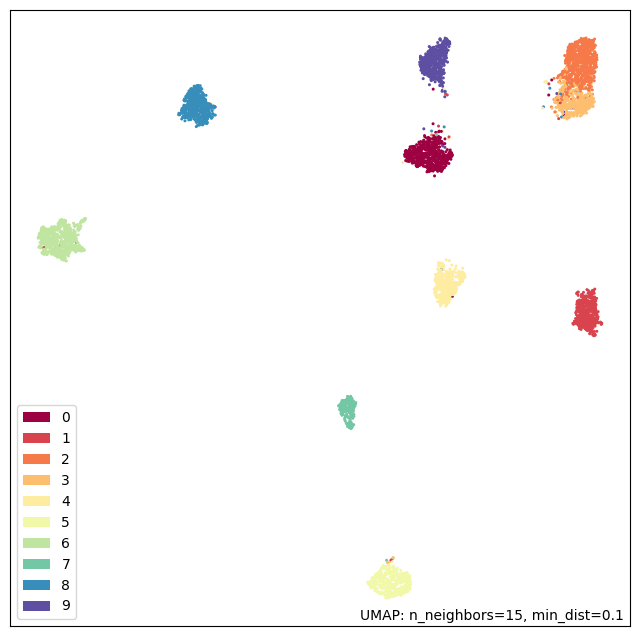

In [119]:
umap.plot.points(X_train_draw, labels=Y_train_encoded)

##### LDA

<Axes: >

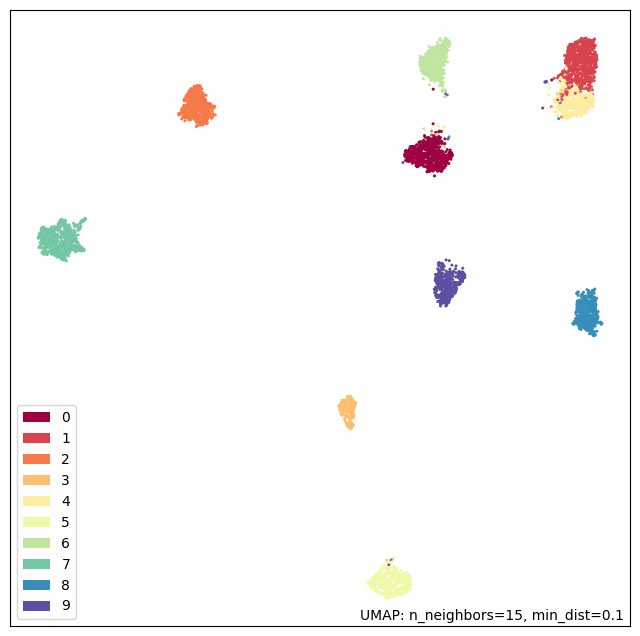

In [120]:
umap.plot.points(X_train_draw, labels=clusters_km_lda)

##### Umap

<Axes: >

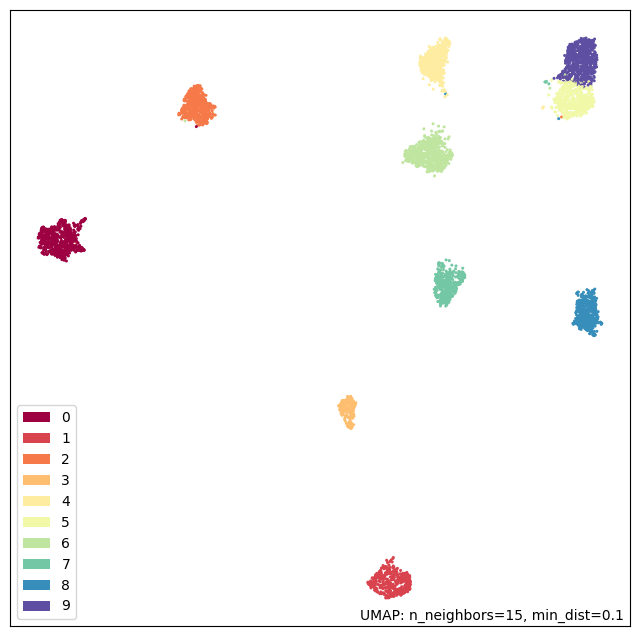

In [121]:
umap.plot.points(X_train_draw, labels=clusters_km_umap)

##### Resultados

In [122]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import mutual_info_score

In [123]:
ri_lda_km = rand_score(Y_train_encoded, clusters_km_lda)
ri_umap_km = rand_score(Y_train_encoded, clusters_km_umap)

sc_lda_km = silhouette_score(X_train_lda, clusters_km_lda)
sc_umap_km = silhouette_score(X_train_umap, clusters_km_umap)

mi_lda_km = mutual_info_score(Y_train_encoded, clusters_km_lda)
mi_umap_km = mutual_info_score(Y_train_encoded, clusters_km_umap)

print("El rand index de kmeans con LDA es: ", ri_lda_km)
print("El rand index de kmeans con umap es: ", ri_umap_km)

print("El silhouette score kmeans con LDA es: ", sc_lda_km)
print("El silhouette score kmeans con umap es: ", sc_umap_km)

print("El mutual information de kmeans con LDA es: ", mi_lda_km)
print("El mutual information de kmeans con umap es: ", mi_umap_km)

El rand index de kmeans con LDA es:  0.9968505170537159
El rand index de kmeans con umap es:  0.9870986789034142
El silhouette score kmeans con LDA es:  0.6310517947859956
El silhouette score kmeans con umap es:  0.79118866
El mutual information de kmeans con LDA es:  2.230093916766681
El mutual information de kmeans con umap es:  2.1390792938053655


#### Testing (umbral = 0.14)

In [124]:
umbral = 0.14

##### LDA

In [125]:
# Calculates number of clusters so that it's equal to the number of labels
n_clusters = len(np.unique(Y_train_encoded))
#print(n_clusters)
data = X_train_lda
#print(data)
centroides_km_lda, clusters_km_lda = kmeans(data, n_clusters, umbral, rand_state_lda)
#print(centroides_km_lda)
print(clusters_km_lda)
print(Y_train_encoded)

[0 1 4 ... 0 6 1]
[0 2 3 ... 0 9 2]


##### Umap

In [126]:
# Calculates number of clusters so that it's equal to the number of labels
n_clusters = len(np.unique(Y_train_encoded))
#print(n_clusters)
data = X_train_umap
#print(data)
centroides_km_umap, clusters_km_umap = kmeans(data, n_clusters, umbral, rand_state_umap)
#print(centroides_km_umap)
print(clusters_km_umap)
print(Y_train_encoded)

[6 9 5 ... 6 4 5]
[0 2 3 ... 0 9 2]


##### Gráficos

In [127]:
import umap.plot

reducer = umap.UMAP()
X_train_draw = reducer.fit(X_train_scaled)

##### Y-Train-Encoded

<Axes: >

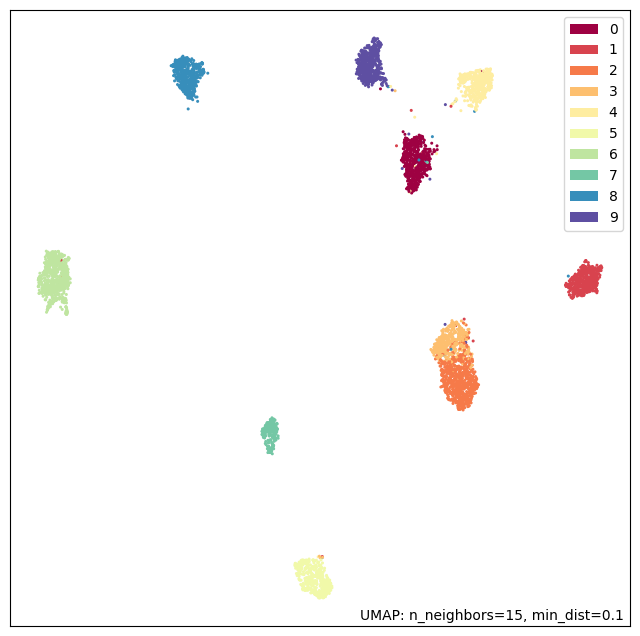

In [128]:
umap.plot.points(X_train_draw, labels=Y_train_encoded)

##### LDA

<Axes: >

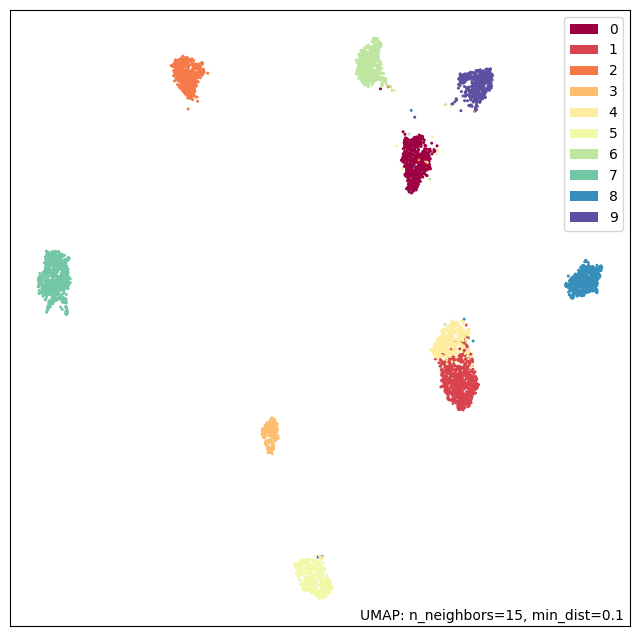

In [129]:
umap.plot.points(X_train_draw, labels=clusters_km_lda)

##### Umap

<Axes: >

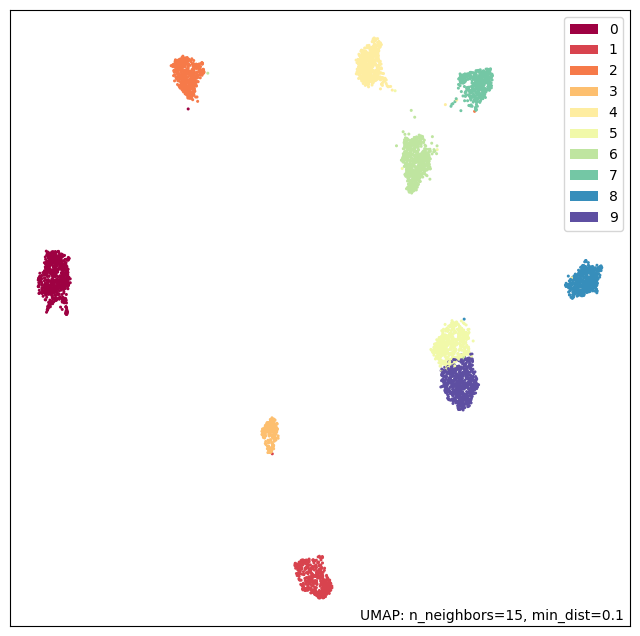

In [130]:
umap.plot.points(X_train_draw, labels=clusters_km_umap)

##### Resultados

In [131]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import mutual_info_score

In [132]:
ri_lda_km = rand_score(Y_train_encoded, clusters_km_lda)
ri_umap_km = rand_score(Y_train_encoded, clusters_km_umap)

sc_lda_km = silhouette_score(X_train_lda, clusters_km_lda)
sc_umap_km = silhouette_score(X_train_umap, clusters_km_umap)

mi_lda_km = mutual_info_score(Y_train_encoded, clusters_km_lda)
mi_umap_km = mutual_info_score(Y_train_encoded, clusters_km_umap)

print("El rand index de kmeans con LDA es: ", ri_lda_km)
print("El rand index de kmeans con umap es: ", ri_umap_km)

print("El silhouette score kmeans con LDA es: ", sc_lda_km)
print("El silhouette score kmeans con umap es: ", sc_umap_km)

print("El mutual information de kmeans con LDA es: ", mi_lda_km)
print("El mutual information de kmeans con umap es: ", mi_umap_km)

El rand index de kmeans con LDA es:  0.9968505170537159
El rand index de kmeans con umap es:  0.9870986789034142
El silhouette score kmeans con LDA es:  0.6310517947859956
El silhouette score kmeans con umap es:  0.79118866
El mutual information de kmeans con LDA es:  2.230093916766681
El mutual information de kmeans con umap es:  2.1390792938053655


#### Testing (umbral = 0.22)

In [133]:
umbral = 0.22

##### LDA

In [134]:
# Calculates number of clusters so that it's equal to the number of labels
n_clusters = len(np.unique(Y_train_encoded))
#print(n_clusters)
data = X_train_lda
#print(data)
centroides_km_lda, clusters_km_lda = kmeans(data, n_clusters, umbral, rand_state_lda)
#print(centroides_km_lda)
print(clusters_km_lda)
print(Y_train_encoded)

[0 1 4 ... 0 6 1]
[0 2 3 ... 0 9 2]


##### Umap

In [135]:
# Calculates number of clusters so that it's equal to the number of labels
n_clusters = len(np.unique(Y_train_encoded))
#print(n_clusters)
data = X_train_umap
#print(data)
centroides_km_umap, clusters_km_umap = kmeans(data, n_clusters, umbral, rand_state_umap)
#print(centroides_km_umap)
print(clusters_km_umap)
print(Y_train_encoded)

[6 9 5 ... 6 4 5]
[0 2 3 ... 0 9 2]


##### Gráficos

In [136]:
import umap.plot

reducer = umap.UMAP()
X_train_draw = reducer.fit(X_train_scaled)

##### Y-Train-Encoded

<Axes: >

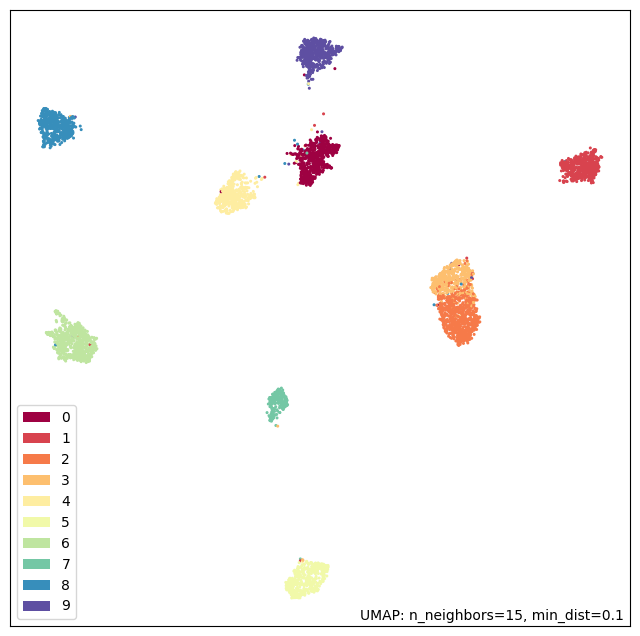

In [137]:
umap.plot.points(X_train_draw, labels=Y_train_encoded)

##### LDA

<Axes: >

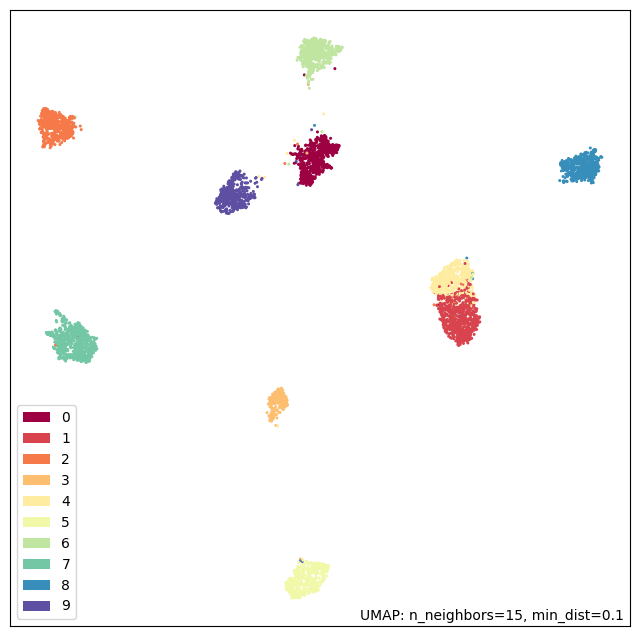

In [138]:
umap.plot.points(X_train_draw, labels=clusters_km_lda)

##### Umap

<Axes: >

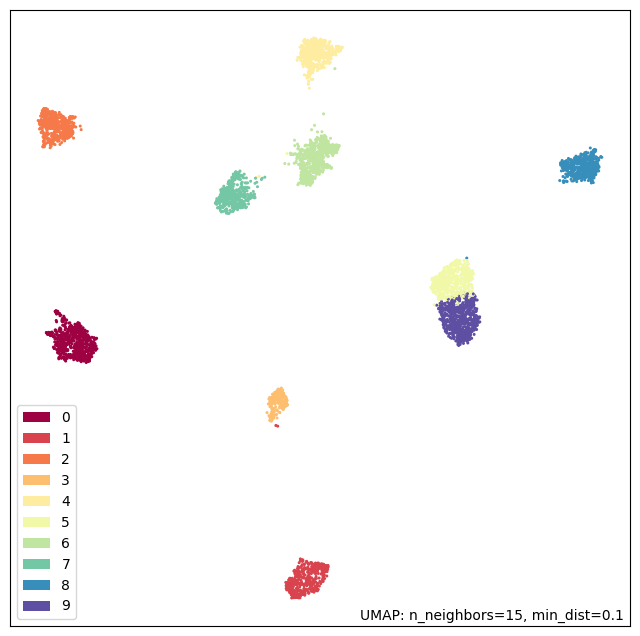

In [139]:
umap.plot.points(X_train_draw, labels=clusters_km_umap)

##### Resultados

In [140]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import mutual_info_score

In [141]:
ri_lda_km = rand_score(Y_train_encoded, clusters_km_lda)
ri_umap_km = rand_score(Y_train_encoded, clusters_km_umap)

sc_lda_km = silhouette_score(X_train_lda, clusters_km_lda)
sc_umap_km = silhouette_score(X_train_umap, clusters_km_umap)

mi_lda_km = mutual_info_score(Y_train_encoded, clusters_km_lda)
mi_umap_km = mutual_info_score(Y_train_encoded, clusters_km_umap)

print("El rand index de kmeans con LDA es: ", ri_lda_km)
print("El rand index de kmeans con umap es: ", ri_umap_km)

print("El silhouette score kmeans con LDA es: ", sc_lda_km)
print("El silhouette score kmeans con umap es: ", sc_umap_km)

print("El mutual information de kmeans con LDA es: ", mi_lda_km)
print("El mutual information de kmeans con umap es: ", mi_umap_km)

El rand index de kmeans con LDA es:  0.9966808039830353
El rand index de kmeans con umap es:  0.9870986789034142
El silhouette score kmeans con LDA es:  0.6307007734348903
El silhouette score kmeans con umap es:  0.79118866
El mutual information de kmeans con LDA es:  2.229016479942867
El mutual information de kmeans con umap es:  2.1390792938053655


#### Testing (umbral = 0.30)

In [142]:
umbral = 0.3

##### LDA

In [143]:
# Calculates number of clusters so that it's equal to the number of labels
n_clusters = len(np.unique(Y_train_encoded))
#print(n_clusters)
data = X_train_lda
#print(data)
centroides_km_lda, clusters_km_lda = kmeans(data, n_clusters, umbral, rand_state_lda)
#print(centroides_km_lda)
print(clusters_km_lda)
print(Y_train_encoded)

[0 1 4 ... 0 6 1]
[0 2 3 ... 0 9 2]


##### Umap

In [144]:
# Calculates number of clusters so that it's equal to the number of labels
n_clusters = len(np.unique(Y_train_encoded))
#print(n_clusters)
data = X_train_umap
#print(data)
centroides_km_umap, clusters_km_umap = kmeans(data, n_clusters, umbral, rand_state_umap)
#print(centroides_km_umap)
print(clusters_km_umap)
print(Y_train_encoded)

[6 9 5 ... 6 4 5]
[0 2 3 ... 0 9 2]


##### Gráficos

In [145]:
import umap.plot

reducer = umap.UMAP()
X_train_draw = reducer.fit(X_train_scaled)

##### Y-Train-Encoded

<Axes: >

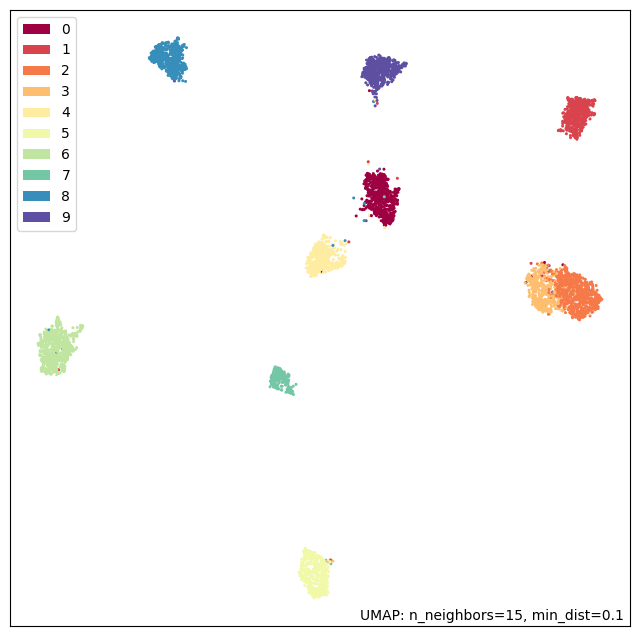

In [146]:
umap.plot.points(X_train_draw, labels=Y_train_encoded)

##### LDA

<Axes: >

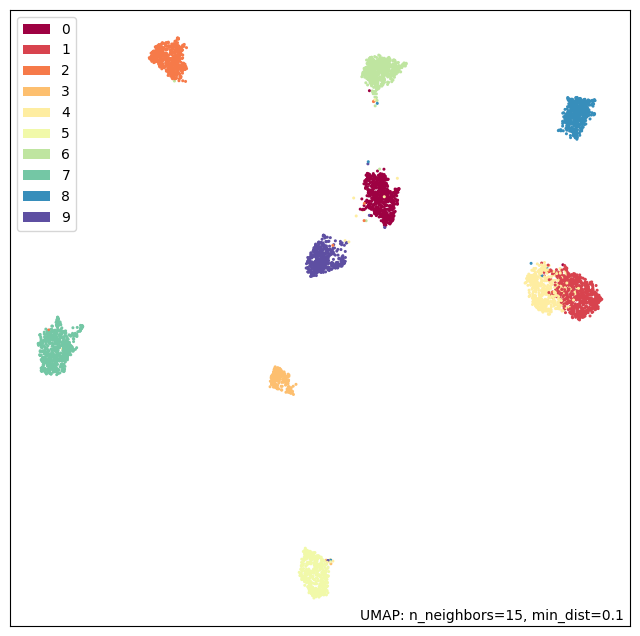

In [147]:
umap.plot.points(X_train_draw, labels=clusters_km_lda)

##### Umap

<Axes: >

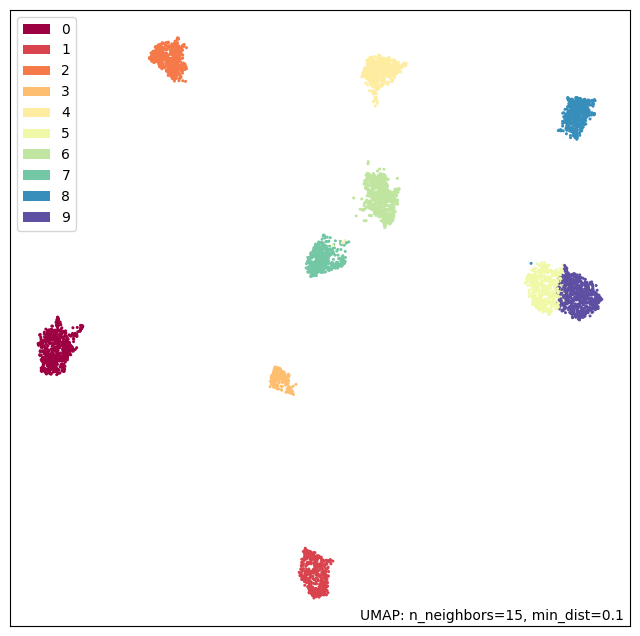

In [148]:
umap.plot.points(X_train_draw, labels=clusters_km_umap)

##### Resultados

In [149]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import mutual_info_score

In [150]:
ri_lda_km = rand_score(Y_train_encoded, clusters_km_lda)
ri_umap_km = rand_score(Y_train_encoded, clusters_km_umap)

sc_lda_km = silhouette_score(X_train_lda, clusters_km_lda)
sc_umap_km = silhouette_score(X_train_umap, clusters_km_umap)

mi_lda_km = mutual_info_score(Y_train_encoded, clusters_km_lda)
mi_umap_km = mutual_info_score(Y_train_encoded, clusters_km_umap)

print("El rand index de kmeans con LDA es: ", ri_lda_km)
print("El rand index de kmeans con umap es: ", ri_umap_km)

print("El silhouette score kmeans con LDA es: ", sc_lda_km)
print("El silhouette score kmeans con umap es: ", sc_umap_km)

print("El mutual information de kmeans con LDA es: ", mi_lda_km)
print("El mutual information de kmeans con umap es: ", mi_umap_km)

El rand index de kmeans con LDA es:  0.9926748683771786
El rand index de kmeans con umap es:  0.9870986789034142
El silhouette score kmeans con LDA es:  0.6233977890555588
El silhouette score kmeans con umap es:  0.79118866
El mutual information de kmeans con LDA es:  2.2029229280050924
El mutual information de kmeans con umap es:  2.1390792938053655


### Validation

In [22]:
label_encoder = LabelEncoder()
Y_val_encoded = label_encoder.fit_transform(Y_val)

In [23]:
import umap
reducer = umap.UMAP()
X_val_umap = reducer.fit_transform(X_val_scaled)

In [26]:
umbral = 0.3
centroides_km_lda, clusters_km_lda = kmeans(X_val_lda, n_clusters, umbral, rand_state_lda)
centroides_km_umap, clusters_km_umap = kmeans(X_val_umap, n_clusters, umbral, rand_state_umap)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
import umap

reducer = umap.UMAP()
X_val_draw = reducer.fit(X_val_scaled)

##### Y-Val-Encoded

In [32]:
#umap.plot.points(X_val_draw, labels=Y_val_encoded)
df_val_draw = pd.DataFrame(X_val_umap)
df_val_draw["label"] = Y_val_encoded

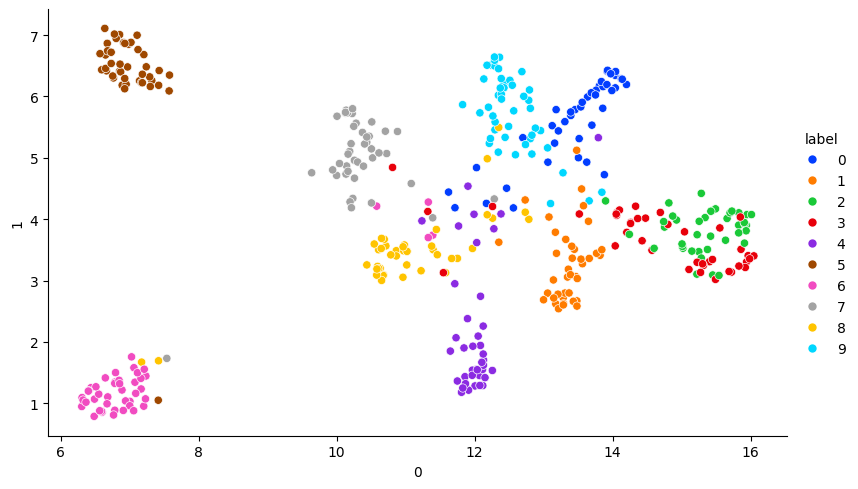

In [33]:
sns.relplot(data=df_val_draw, x=0, y=1, hue='label', aspect=1.61, palette="bright")
plt.show()

##### LDA

In [34]:
#umap.plot.points(X_val_draw, labels=clusters_km_lda)
df_val_draw = pd.DataFrame(X_val_umap)
df_val_draw["label"] = clusters_km_lda

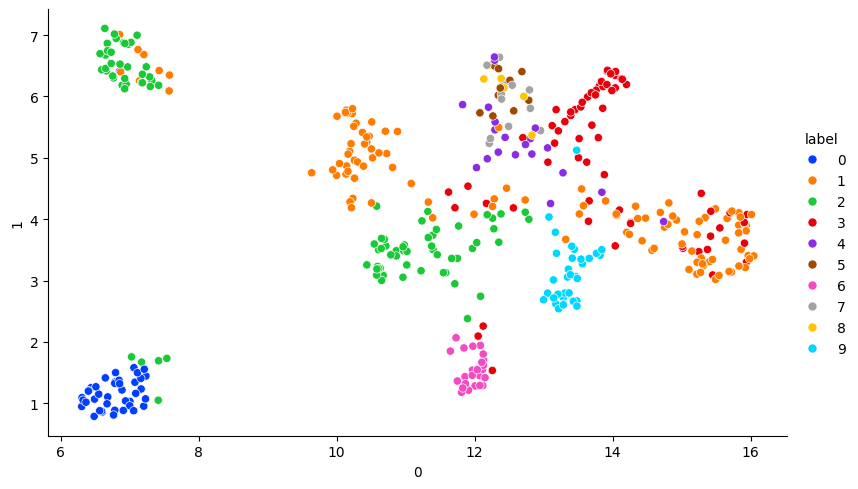

In [35]:
sns.relplot(data=df_val_draw, x=0, y=1, hue='label', aspect=1.61, palette="bright")
plt.show()

##### Umap

In [36]:
#umap.plot.points(X_val_draw, labels=clusters_km_umap)
df_val_draw = pd.DataFrame(X_val_umap)
df_val_draw["label"] = clusters_km_umap

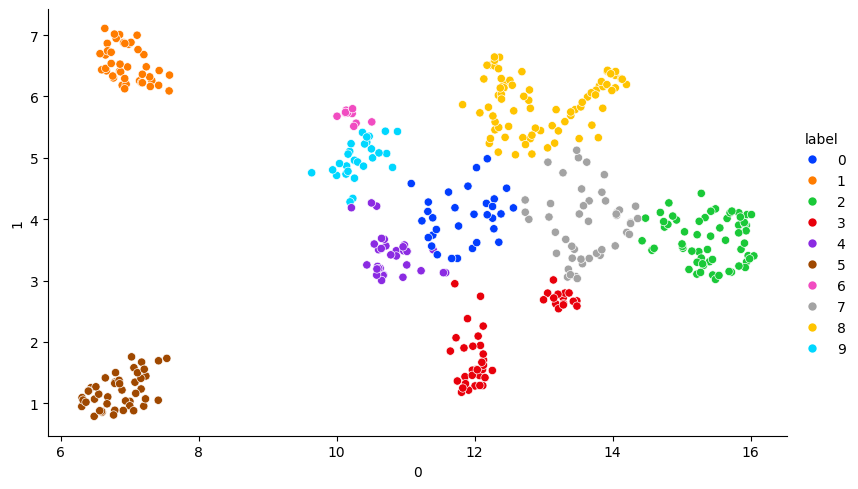

In [37]:
sns.relplot(data=df_val_draw, x=0, y=1, hue='label', aspect=1.61, palette="bright")
plt.show()

##### Scores

In [ ]:
ri_lda_km = rand_score(Y_val_encoded, clusters_km_lda)
ri_umap_km = rand_score(Y_val_encoded, clusters_km_umap)
print("El rand index de kmeans con lda es: ", ri_lda_km)
print("El rand index de kmeans con umap es: ", ri_umap_km)

sc_lda_km = silhouette_score(X_val_lda, clusters_km_lda)
sc_umap_km = silhouette_score(X_val_umap, clusters_km_umap)
print("El silhouette coefficient de kmeans con lda es: ", sc_lda_km)
print("El silhouette coefficient de kmeans con umap es: ", sc_umap_km)

mi_lda_km = mutual_info_score(Y_val_encoded, clusters_km_lda)
mi_umap_km = mutual_info_score(Y_val_encoded, clusters_km_umap)
print("El mutual information de kmeans con lda es: ", mi_lda_km)
print("El mutual information de kmeans con umap es: ", mi_umap_km)

El rand index de kmeans con lda es:  0.8668145129515598
El rand index de kmeans con umap es:  0.9192511623194606
El silhouette coefficient de kmeans con lda es:  0.17560025330932297
El silhouette coefficient de kmeans con umap es:  0.5024462
El mutual information de kmeans con lda es:  1.385450444935879
El mutual information de kmeans con umap es:  1.6254171888634212


### Test

In [ ]:
import umap

reducer = umap.UMAP()
X_test_umap = reducer.fit_transform(X_test_scaled)

In [ ]:
#X_test_lda_np = X_test_lda.to_numpy()

centroides_km_lda, clusters_km_lda = kmeans(X_test_lda, n_clusters, umbral, rand_state_lda)

centroides_km_umap, clusters_km_umap = kmeans(X_test_umap, n_clusters, umbral, rand_state_umap)

#labels_db_lda = DBSCAN(X_test_lda_np, radio, vecinos_min)

#labels_db_umap = DBSCAN(X_test_umap_np, radio, vecinos_min)

In [ ]:
X_test_draw = reducer.fit(X_test_scaled)

##### Umap

<Axes: >

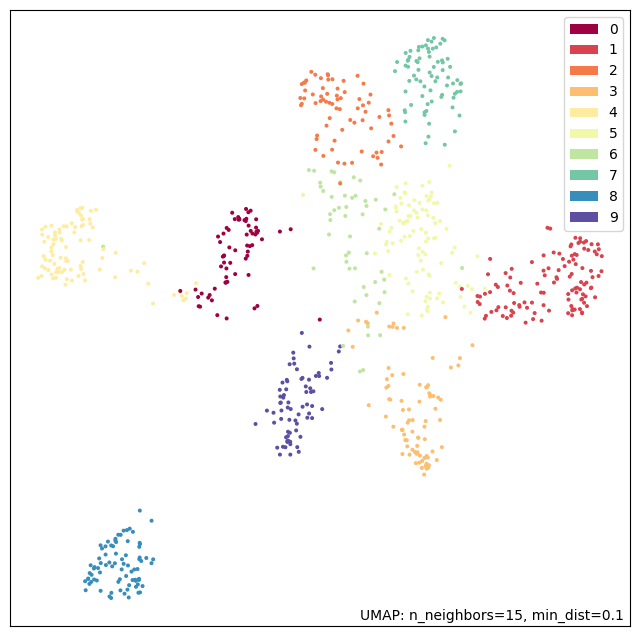

In [ ]:
umap.plot.points(X_test_draw, labels=clusters_km_umap)

In [ ]:
df = pd.read_csv(path + '/datasets/test_r21d_complete_10.csv')       # data training con el target
Y_test = df.iloc[:,-1:].copy()
print(Y_test)

      youtube_id
0    zujZagp-4jQ
1    ZuvChCAjbak
2    ZxpwgIZg4lI
3    zz1YMml9Z6k
4    08JqXh8jCgk
..           ...
800  zMdAi3xo7Us
801  ZmNQ6kMVb-g
802  ZOZslTEUt7M
803  zrrqDli62kE
804  ZTTEkAxEnUs

[805 rows x 1 columns]


In [ ]:
Y_test.loc[:, "label"] = clusters_km_umap
Y_test = Y_test.set_index("youtube_id")

Y_test.to_csv(path + "/results/y_test_km_umap.csv")

In [ ]:
print(Y_test)

             label
youtube_id        
zujZagp-4jQ      2
ZuvChCAjbak      6
ZxpwgIZg4lI      2
zz1YMml9Z6k      0
08JqXh8jCgk      2
...            ...
zMdAi3xo7Us      9
ZmNQ6kMVb-g      6
ZOZslTEUt7M      2
zrrqDli62kE      5
ZTTEkAxEnUs      9

[805 rows x 1 columns]


##### LDA

<Axes: >

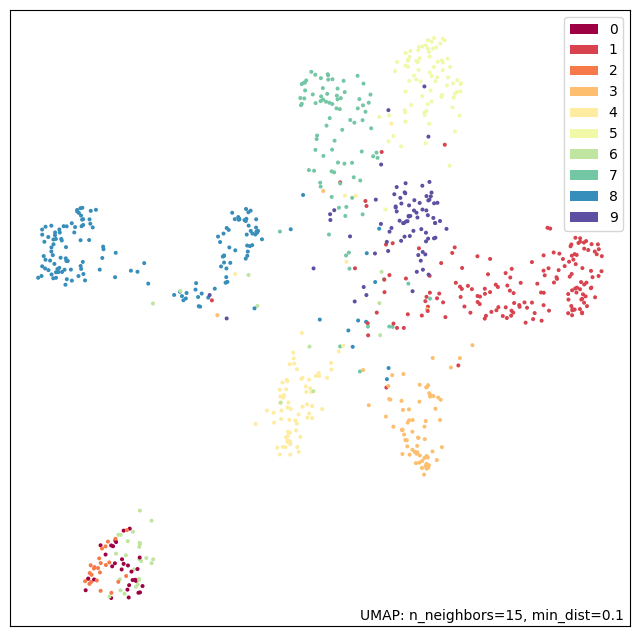

In [ ]:
umap.plot.points(X_test_draw, labels=clusters_km_lda)

In [ ]:
df = pd.read_csv(path + '/datasets/test_r21d_complete_10.csv')       # data training con el target
Y_test = df.iloc[:,-1:].copy()
print(Y_test)

      youtube_id
0    zujZagp-4jQ
1    ZuvChCAjbak
2    ZxpwgIZg4lI
3    zz1YMml9Z6k
4    08JqXh8jCgk
..           ...
800  zMdAi3xo7Us
801  ZmNQ6kMVb-g
802  ZOZslTEUt7M
803  zrrqDli62kE
804  ZTTEkAxEnUs

[805 rows x 1 columns]


In [ ]:
Y_test.loc[:, "label"] = clusters_km_lda
Y_test = Y_test.set_index("youtube_id")

Y_test.to_csv(path + "/results/y_test_km_lda.csv")

In [ ]:
print(Y_test)

             label
youtube_id        
zujZagp-4jQ      7
ZuvChCAjbak      7
ZxpwgIZg4lI      5
zz1YMml9Z6k      8
08JqXh8jCgk      5
...            ...
zMdAi3xo7Us      4
ZmNQ6kMVb-g      9
ZOZslTEUt7M      7
zrrqDli62kE      9
ZTTEkAxEnUs      4

[805 rows x 1 columns]
